# LSTM Traffic Prediction (Baseline)

## Loading Data

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7764461083043169603
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 11311375975
locality {
  bus_id: 1
}
incarnation: 1744231386741455035
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0"
]


In [4]:
import requests
import json

In [5]:
def run_query(query): # A simple function to use requests to make the API call. Returns json content from query.
    request = requests.get('https://my.es.net/graphql', json={'query': query})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))

In [6]:
#Get IDs of all edges in site graph

query_ids = '''
{
  mapTopology(name: "routed_toplevel") {
    edges {
      name
      id
    }
  }
}
'''

result_ids = run_query(query_ids)
print(json.dumps(result_ids, indent=1))

{
 "data": {
  "mapTopology": {
   "edges": [
    {
     "name": "CHIC--STAR", 
     "id": "1767"
    }, 
    {
     "name": "ATLA--NASH", 
     "id": "1747"
    }, 
    {
     "name": "ALBQ--DENV", 
     "id": "1733"
    }, 
    {
     "name": "ALBQ--ELPA", 
     "id": "1734"
    }, 
    {
     "name": "ALBQ--KCP-ALBQ", 
     "id": "1735"
    }, 
    {
     "name": "ALBQ--LANL", 
     "id": "1736"
    }, 
    {
     "name": "ALBQ--SNLA", 
     "id": "1737"
    }, 
    {
     "name": "AMES--STAR", 
     "id": "1738"
    }, 
    {
     "name": "AMST--CERN-272", 
     "id": "1740"
    }, 
    {
     "name": "AMST--LOND", 
     "id": "1741"
    }, 
    {
     "name": "AOFA--NEWY", 
     "id": "1744"
    }, 
    {
     "name": "AOFA--STAR", 
     "id": "1745"
    }, 
    {
     "name": "AOFA--WASH", 
     "id": "1746"
    }, 
    {
     "name": "DENV--NGA-SW", 
     "id": "1771"
    }, 
    {
     "name": "ATLA--ORNL", 
     "id": "1748"
    }, 
    {
     "name": "ATLA--WASH", 
     "id":

In [7]:
site_name = "ornl"

query = '''
{
  networkEntity(shortName: "%s") {
    flow(breakdown: "site", beginTime: "2018-05-14T21:27:59.547Z", endTime: "2018-05-15T21:27:59.547Z") 
    {
      traffic
    }
  }
}
''' % (site_name)

result = run_query(query)
print(json.dumps(result, indent=1))

{
 "data": {
  "networkEntity": {
   "flow": [
    {
     "traffic": "{\"utc\": true, \"points\": [[1526331600000, 9677526016, 19301929], [1526333400000, 9647556266, 20108624], [1526335200000, 10895732053, 23115449], [1526337000000, 9530400938, 19562533], [1526338800000, 9469022720, 20959845], [1526340600000, 6412522410, 14703724], [1526342400000, 1222354574, 3420867], [1526344200000, 3568279635, 8103987], [1526346000000, 7504940885, 17117617], [1526347800000, 7984734037, 18237389], [1526349600000, 8068846677, 17604889], [1526351400000, 8051788032, 18298347], [1526353200000, 9012063402, 18985490], [1526355000000, 8764675157, 17985218], [1526356800000, 7173337941, 15938556], [1526358600000, 8981955925, 19082050], [1526360400000, 8872589226, 20738190], [1526362200000, 9062395904, 21797339], [1526364000000, 8254347861, 19663969], [1526365800000, 8545163434, 19669121], [1526367600000, 7355956309, 17047491], [1526369400000, 8432487680, 19766750], [1526371200000, 7434529450, 17540468], [1526

In [8]:
edge_id = "1767"

query = '''
{
  mapTopologyEdge(id: "%s") {
		name
    traffic(beginTime: "2018-05-18T18:22:53.253Z", endTime: "2018-05-21T19:22:53.253Z")
  }
}
''' % (edge_id)

result_edge = run_query(query)
print(json.dumps(result_edge, indent=1))

{
 "data": {
  "mapTopologyEdge": {
   "traffic": "{\"labels\": [\"CHIC--STAR\", \"STAR--CHIC\"], \"utc\": true, \"points\": [[1526667750000, 55704044638.66667, 19573998128.266666], [1526667780000, 49760490536.0, 18844759804.266666], [1526667810000, 30323515824.0, 18699743849.866665], [1526667840000, 33205472566.13333, 24562875481.333332], [1526667870000, 47844847355.73334, 29964113644.0], [1526667900000, 47411446376.26666, 29200598851.2], [1526667930000, 40972047857.066666, 23101909603.733334], [1526667960000, 48746212957.33333, 23959019308.266666], [1526667990000, 66290367779.2, 25325905935.466667], [1526668020000, 47859983008.8, 27589445800.0], [1526668050000, 46635793334.13333, 27490544054.13333], [1526668080000, 65005326356.8, 24712988448.533333], [1526668110000, 83189027173.06667, 24031401942.4], [1526668140000, 46051944184.0, 20521738030.933334], [1526668170000, 50416475362.933334, 19697559603.733334], [1526668200000, 50471479481.333336, 18901580174.933334], [1526668230000, 4088

In [9]:
def query_edge(edge_id, beginTime, endTime):
    query = '''
    {
      mapTopologyEdge(id: "%s") {
            name
        traffic(beginTime: "%s", endTime: "%s")
      }
    }
    ''' % (edge_id, beginTime, endTime)
    
    return  run_query(query)

## Process Data

### Edge IDs

In [10]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
%matplotlib inline

In [11]:
#Store mapping of IDs to edge names in a local dictionary

def clean_alledge_data(json_data):
    cleaned_result = json_data['data']['mapTopology']['edges']
    edge_dict = {}
    for item in cleaned_result:
        edge_dict[str(item['id'])] = str(item['name'])
    return edge_dict

edge_dict = clean_alledge_data(result_ids)

### Single Edge Data

In [12]:
#Clean data for single edge

def clean_edge_data(json_data):
    #get "traffic" label from json data
    traffic = str(json_data['data']['mapTopologyEdge']['traffic'])

    #get index of "points" label
    index = traffic.find("points")

    #get "points" data
    in_out = traffic[index+len("points: "):].split("],")
    points = [str(item).strip().replace("[", "").replace("]", "").replace(",", "").split() for item in in_out]
    points = points[0:len(points)-1]

    #get labels of points data (ex. CHIC--STAR, STAR--CHIC)
    labels = traffic[traffic.find("labels")+len("labels: "):].split("],")[0].replace("[", 
                                            "").replace("]", "").replace(",", "").replace('"', "").strip().split()
    #Add "Time" to list for header in DataFrame
    labels = ["Time"] + labels
    
    #Create DataFrame
    df = pd.DataFrame(points, columns=labels)
    df = df.astype('float')
    df['Time'] = df['Time'].apply(lambda x: datetime.fromtimestamp(x/1000.))
    
    return df

In [13]:
#Create DataFrame
points_1767 = clean_edge_data(result_edge)
points_1767.head()

,Time,CHIC--STAR,STAR--CHIC
0,2018-05-18 18:22:30,5.570404e+10,1.957400e+10
1,2018-05-18 18:23:00,4.976049e+10,1.884476e+10
2,2018-05-18 18:23:30,3.032352e+10,1.869974e+10
3,2018-05-18 18:24:00,3.320547e+10,2.456288e+10
4,2018-05-18 18:24:30,4.784485e+10,2.996411e+10


### Single site data (not using) 

In [78]:
#records for one day from ornl to anl
in_out_unicode = result["data"]["networkEntity"]["flow"][3]["traffic"][25:].split("],") #item 0 is nersc

#clean data
in_out = [str(item).strip().replace("[", "").replace("]", "").replace(",", "").split() for item in in_out_unicode]

#get name of connecting site
connecting_name = in_out[len(in_out) - 1][1].replace('"', '')

print("First site connecting to %s: %s" % (site_name, connecting_name)) 
print("Sample of records: ")
print(in_out[0:5])

First site connecting to ornl: anl
Sample of records: 
[['1526333100000', '106251671', '3079695'], ['1526333400000', '80302855', '1965422'], ['1526333700000', '82223373', '2048001'], ['1526334000000', '83161370', '2230855'], ['1526334300000', '83528693', '2184748']]


In [58]:
d1 = datetime.date(2018, 5, 1)  # start date
d2 = datetime.date(2018, 5, 15)  # end date

delta = d2 - d1         # timedelta

dates = []
for i in range(delta.days + 1):
    new_date = (d1 + datetime.timedelta(days=i)).strftime('%Y-%m-%d') #get dates between start and end date
    new_date += "T21:27:59.547Z" #append time
    dates.append(new_date)

In [59]:
dates

['2018-05-01T21:27:59.547Z',
 '2018-05-02T21:27:59.547Z',
 '2018-05-03T21:27:59.547Z',
 '2018-05-04T21:27:59.547Z',
 '2018-05-05T21:27:59.547Z',
 '2018-05-06T21:27:59.547Z',
 '2018-05-07T21:27:59.547Z',
 '2018-05-08T21:27:59.547Z',
 '2018-05-09T21:27:59.547Z',
 '2018-05-10T21:27:59.547Z',
 '2018-05-11T21:27:59.547Z',
 '2018-05-12T21:27:59.547Z',
 '2018-05-13T21:27:59.547Z',
 '2018-05-14T21:27:59.547Z',
 '2018-05-15T21:27:59.547Z']

In [12]:
for i in range(len(dates) - 1):
    query = '''
    {
      networkEntity(shortName: "anl") {
        flow(breakdown: "site", beginTime: "%s", endTime: "%s") 
        {
          traffic
        }
      }
    }
    ''' % (dates[i], dates[i+1])
    result = run_query(query)
    
    for j in range(len(result["data"]["networkEntity"]["flow"])):
        in_out_unicode = result["data"]["networkEntity"]["flow"][j]["traffic"][25:].split("],")
        in_out = [str(item).strip().replace("[", "").replace("]", "").replace(",", "").split() for item in in_out_unicode][:-1]

## Data Analysis

Text(0,0.5,u'Traffic')

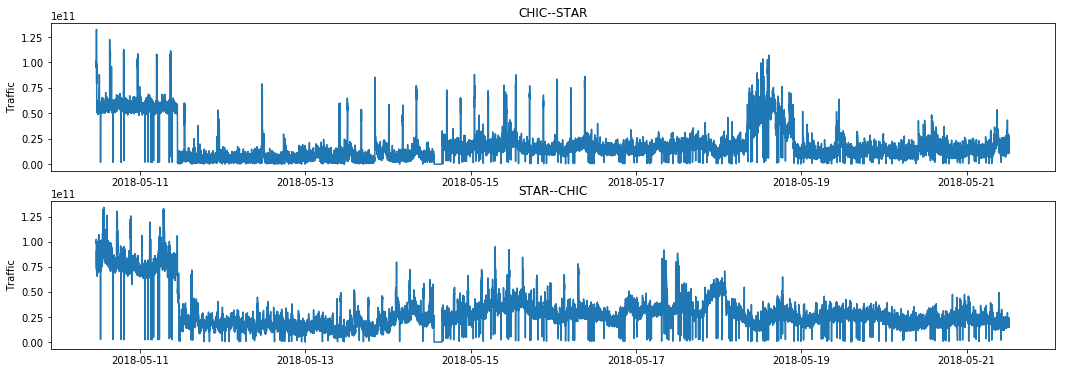

In [12]:
column_names = list(points_1767.columns.values)

#Total plot over month
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(211)
ax1.plot(points_1767['Time'], points_1767[column_names[1]])
ax2 = fig.add_subplot(212)
ax2.plot(points_1767['Time'], points_1767[column_names[2]])

ax1.set_title(column_names[1])
ax1.set_ylabel("Traffic")
ax2.set_title(column_names[2])
ax2.set_ylabel("Traffic")

Text(0,0.5,u'Traffic')

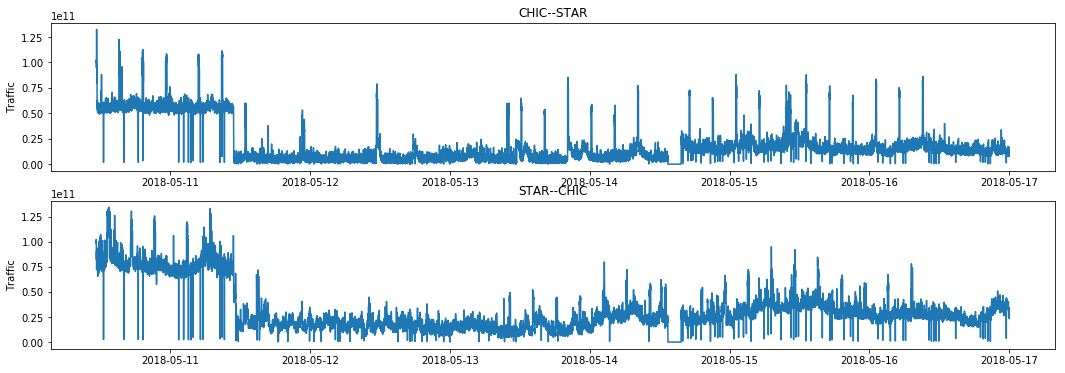

In [13]:
#Plot over a selected week

selected_week = points_1767[(points_1767['Time'].apply(lambda x: x.day >= 10)) & 
                           (points_1767['Time'].apply(lambda x: x.day < 17))]
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(211)
ax1.plot(selected_week['Time'], selected_week[column_names[1]])
ax2 = fig.add_subplot(212)
ax2.plot(selected_week['Time'], selected_week[column_names[2]])

ax1.set_title(column_names[1])
ax1.set_ylabel("Traffic")
ax2.set_title(column_names[2])
ax2.set_ylabel("Traffic")

Text(0,0.5,u'Traffic')

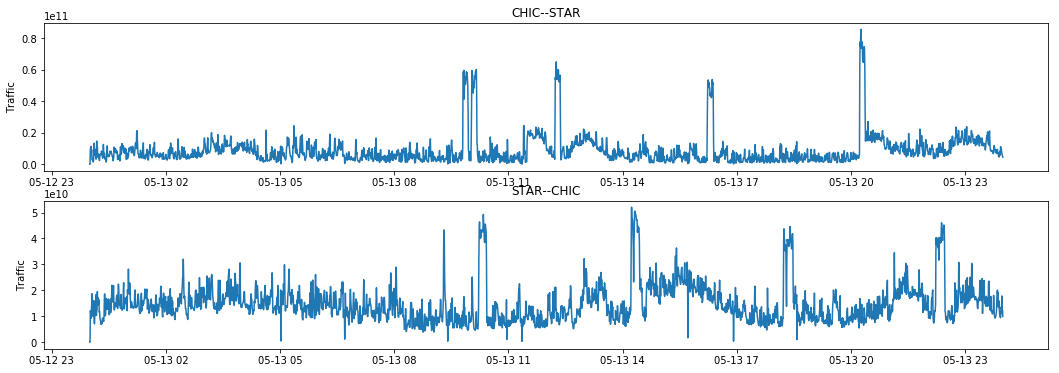

In [14]:
selected_day = points_1767[(points_1767['Time'].apply(lambda x: x.day >= 13)) & 
                           (points_1767['Time'].apply(lambda x: x.day < 14))]
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(211)
ax1.plot(selected_day['Time'], selected_day['CHIC--STAR'])
ax2 = fig.add_subplot(212)
ax2.plot(selected_day['Time'], selected_day['STAR--CHIC'])

ax1.set_title("CHIC--STAR")
ax1.set_ylabel("Traffic")
ax2.set_title("STAR--CHIC")
ax2.set_ylabel("Traffic")

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3000
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -70355.801
Method:                       css-mle   S.D. of innovations     3705027657.350
Date:                Wed, 23 May 2018   AIC                         140725.603
Time:                        13:45:02   BIC                         140767.647
Sample:                             1   HQIC                        140740.726
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.075e+06   3.57e+07     -0.058      0.954   -7.21e+07     6.8e+07
ar.L1.D.y     -0.3025      0.018    -16.584      0.000      -0.338      -0.267
ar.L2.D.y     -0.2543      0.019    -13.398      0.0

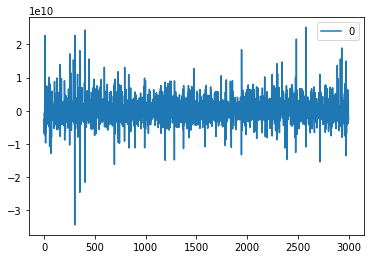

In [122]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA model
arima_model = ARIMA(np.asarray(points_1767[['Time', 'CHIC--STAR']].set_index('Time')), order=(5,1,0))
arima_model_fit = arima_model.fit(disp=0)
print(arima_model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(arima_model_fit.resid)
residuals.plot()

                  0
count  3.000000e+03
mean   1.185863e+06
std    3.705844e+09
min   -3.442543e+10
25%   -1.987144e+09
50%   -3.486481e+08
75%    1.784365e+09
max    2.519293e+10


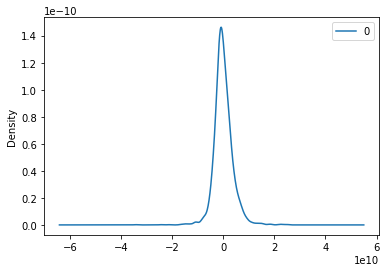

In [123]:
residuals.plot(kind='kde')
print(residuals.describe())

### Edge data feature extraction 

In [14]:
def edge_features(df, pathway):
    #Get only one pathway (CHIC--STAR)
    single_pathway = df[['Time', pathway]]

    #Convert times to datetime objects
    times = single_pathway['Time']

    #Is date weekend?
    weekends = times.apply(lambda x: x.weekday() >= 5)*1
    single_pathway['Weekend'] = weekends

    #Add day of the week
    days = times.apply(lambda x: x.weekday())
    single_pathway['Day'] = days

    #Add hours, minutes
    hours = times.apply(lambda x: x.hour)
    minutes = times.apply(lambda x: x.minute + x.second/60.)
    single_pathway['Hour'] = hours
    single_pathway['Minute'] = minutes

    return single_pathway

In [15]:
points_1767_chicstar = edge_features(points_1767, 'CHIC--STAR')
points_1767_chicstar.head()

,Time,CHIC--STAR,Weekend,Day,Hour,Minute
0,2018-05-18 18:22:30,5.570404e+10,0,4,18,22.5
1,2018-05-18 18:23:00,4.976049e+10,0,4,18,23.0
2,2018-05-18 18:23:30,3.032352e+10,0,4,18,23.5
3,2018-05-18 18:24:00,3.320547e+10,0,4,18,24.0
4,2018-05-18 18:24:30,4.784485e+10,0,4,18,24.5


## Model

In [24]:
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Dense, LSTM, Activation, Dropout, Bidirectional, TimeDistributed, RepeatVector
#from keras.utils.vis_utils import plot_model
from keras.optimizers import SGD
from random import uniform
import json
# Fix AttributeError: 'module' object has no attribute 'control_flow_ops'
import tensorflow as tf
from tensorflow.python.ops import control_flow_ops
tensorflow.control_flow_ops = control_flow_ops

In [25]:
tf.Session(config=tf.ConfigProto(log_device_placement=True))

Inverse scaling for predictions, graphing results

In [16]:
def inverse_transform(pred, traffic_scaler):    
    return traffic_scaler.inverse_transform(pred)

def graph_results(model, X_test, Y_test, traffic_scaler, batch_size = 1):
    # walk-forward validation on the test data
    pred_x_test = model.predict(X_test, batch_size)
    pred_test = inverse_transform(pred_x_test, traffic_scaler)

    y_test = np.float_(Y_test)
    y_test_inv = inverse_transform(y_test, traffic_scaler)

    line_test_pred = np.reshape(pred_test, pred_test.shape[0])
    line_test_real = np.reshape(y_test_inv, y_test_inv.shape[0])
    plt.figure(figsize=(20,10))
    plt.plot(line_test_real, color='blue',label='Original', linewidth=1)
    plt.plot(line_test_pred, color='red',label='Prediction', linewidth=1)
    plt.legend(loc='best')
    plt.title('Test - Comparison')
    plt.show()

### Single previous value w/ additional features

In [17]:
def train_test_wfeatures(df, pathway, split_proportion, scaler, traffic_scaler, print_shapes = True):
    """Returns training and test data from Pandas DataFrame of data

    Args:
        df (DataFrame): A Pandas DataFrame containing the data for one site to another site
                        the dataframe should contain time, features (ex. Day, Month, Weekend) 
                        and the response variable.
        pathway (str): The names of the two sites separated by a double dash (ex. "CHIC--STAR")
        split_proportion (float): Proportion (from 0 to 1) of data to be allocated to training data
        scaler (MinMaxScaler): scaler for features
        traffic_scaler (MinMaxScaler): scaler for response variable
        print_shapes (bool): True (default) to print shapes of the training and test data
                             False to turn off printing
        
        """
    
    #Split features from response variable
    X = df.drop('Time', axis = 1).as_matrix() #drop time to get all features
    Y = df[[pathway]].shift(1).fillna(0).as_matrix() #shift traffic values down 1 to create response variable

    #Normalize
    X = scaler.fit_transform(X)
    Y = traffic_scaler.fit_transform(Y)

    #reshape to [samples, features, timesteps]
    X = X.reshape(X.shape[0], 1, X.shape[1])

    #Train-test split
    row = int(round(split_proportion * df.shape[0]))
    X_train = X[:row]
    Y_train = Y[:row]
    X_test = X[row:]
    Y_test = Y[row:]
    
    if print_shapes:
        print("X_train shape: ", X_train.shape)
        print("Y_train shape: ", Y_train.shape)
        print("X_test shape: ", X_test.shape)
        print("Y_test shape: ", Y_test.shape)
    
    return X_train, Y_train, X_test, Y_test

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))
X_train, Y_train, X_test, Y_test = train_test_wfeatures(points_1767_chicstar, 
                                                        "CHIC--STAR", 0.9, scaler, traffic_scaler)

X_train shape:  (7885, 1, 5)
Y_train shape:  (7885, 1)
X_test shape:  (876, 1, 5)
Y_test shape:  (876, 1)


/home/kvsingh/anaconda2/envs/carnd-term1/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/kvsingh/anaconda2/envs/carnd-term1/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [26]:
batch_size = 1
# out_neurons = 1
# hidden_neurons = 500
# hidden_inner_factor = uniform(0.1, 1.1)
# hidden_neurons_inner = int(hidden_inner_factor * hidden_neurons)
# dropout = uniform(0, 0.5)
# dropout_inner = uniform(0, 1)

# model = Sequential()
# model.add(LSTM(output_dim=hidden_neurons,
#                input_dim=X_train.shape[2],
#                init='uniform',
#                return_sequences=True,
#                consume_less='mem'))
# model.add(Dropout(dropout))
# model.add(LSTM(output_dim=hidden_neurons_inner,
#                input_dim=hidden_neurons,
#                return_sequences=True,
#                consume_less='mem'))
# model.add(Dropout(dropout_inner))
# model.add(LSTM(output_dim=hidden_neurons_inner,
#                input_dim=hidden_neurons_inner,
#                return_sequences=False,
#                consume_less='mem'))
# model.add(Dropout(dropout_inner))
# model.add(Activation('relu'))
# model.add(Dense(output_dim=out_neurons,
#                 input_dim=hidden_neurons_inner))
# model.add(Activation('relu'))

model = Sequential()
model.add(LSTM(5, batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))

In [27]:
nb_epoch = 20

print("-- Building --")
model.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    model.fit(X_train, Y_train, nb_epoch=1, batch_size=batch_size, shuffle=False)
    model.reset_states()

-- Building --
-- Training --
Epoch 1/1
1064/7885 [===>..........................] - ETA: 42s - loss: 0.0278

KeyboardInterrupt: 

Test loss: 0.0007579516653358721


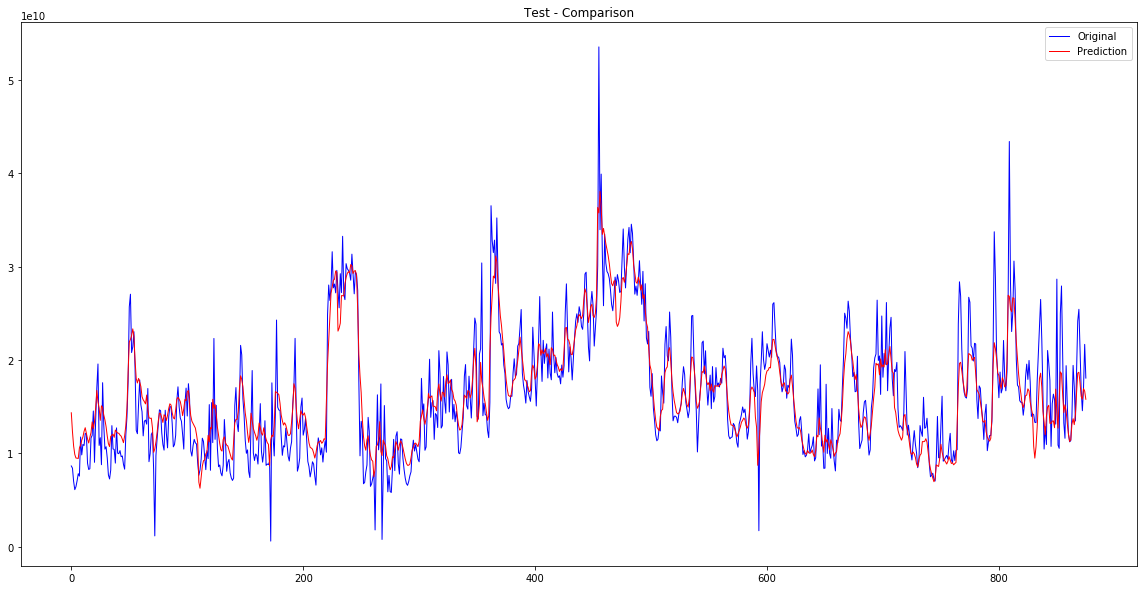

In [63]:
score = model.evaluate(X_test, Y_test, verbose=0, batch_size = 1)
print('Test loss:', score)

graph_results(model, X_test, Y_test, traffic_scaler)

In [126]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [X_test[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    print(moving_test_window.shape)
    
    for i in range(1, n_future_preds):
        preds_one_step = model_complex.predict(moving_test_window, batch_size = 1) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        
        deleted = np.delete(X_test[i,:].tolist(), 0)
        new = [np.insert(deleted, 0, preds_one_step[0,0])]
        new = np.array(new).reshape(1,1,5)
        moving_test_window = np.concatenate((moving_test_window, new), axis=1).reshape(i+1, 1, 5)
        
        #preds_one_step.append
        #preds_one_step = preds_one_step.reshape(1,1,5) # Reshaping the prediction to 3D array for concatenation with moving test window
        #moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    preds_moving = np.array(preds_moving).reshape(len(preds_moving), 1)
    preds_moving = traffic_scaler.inverse_transform(preds_moving)
    
    return preds_moving

In [127]:
#Predicting next time step w/ previous prediction (need to fix)

preds_moving = moving_test_window_preds(500)

y_test = np.float_(Y_test)
y_test_inv = inverse_transform(y_test, traffic_scaler)

line_test_pred = np.reshape(preds_moving, preds_moving.shape[0])
line_test_real = np.reshape(y_test_inv, y_test_inv.shape[0])
plt.figure(figsize=(20,10))
plt.plot(line_test_real, color='blue',label='Original', linewidth=1)
plt.plot(line_test_pred, color='red',label='Prediction', linewidth=1)
plt.legend(loc='best')
plt.title('Test - Comparison')
plt.show()

(1, 1, 5)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [79]:
model_complex = Sequential()
model_complex.add(LSTM(10, batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True, return_sequences = True))
model_complex.add(LSTM(20, batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True))
model_complex.add(Dense(1))

In [80]:
print("-- Building --")
model_complex.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    model_complex.fit(X_train, Y_train, epochs=1, batch_size=batch_size, shuffle=False)
    model_complex.reset_states()

-- Building --
-- Training --
Epoch 1/1
7885/7885 [==============================] - 118s 15ms/step - loss: 0.0042
Epoch 1/1
7885/7885 [==============================] - 123s 16ms/step - loss: 0.0039
Epoch 1/1
7885/7885 [==============================] - 118s 15ms/step - loss: 0.0032
Epoch 1/1
7885/7885 [==============================] - 121s 15ms/step - loss: 0.0017
Epoch 1/1
7885/7885 [==============================] - 115s 15ms/step - loss: 0.0014
Epoch 1/1
7885/7885 [==============================] - 113s 14ms/step - loss: 0.0013
Epoch 1/1
7885/7885 [==============================] - 108s 14ms/step - loss: 0.0013
Epoch 1/1
7885/7885 [==============================] - 111s 14ms/step - loss: 0.0013
Epoch 1/1
7885/7885 [==============================] - 111s 14ms/step - loss: 0.0012
Epoch 1/1
7885/7885 [==============================] - 110s 14ms/step - loss: 0.0012
Epoch 1/1
7885/7885 [==============================] - 111s 14ms/step - loss: 0.0012
Epoch 1/1
7885/7885 [==============

(876, 1)


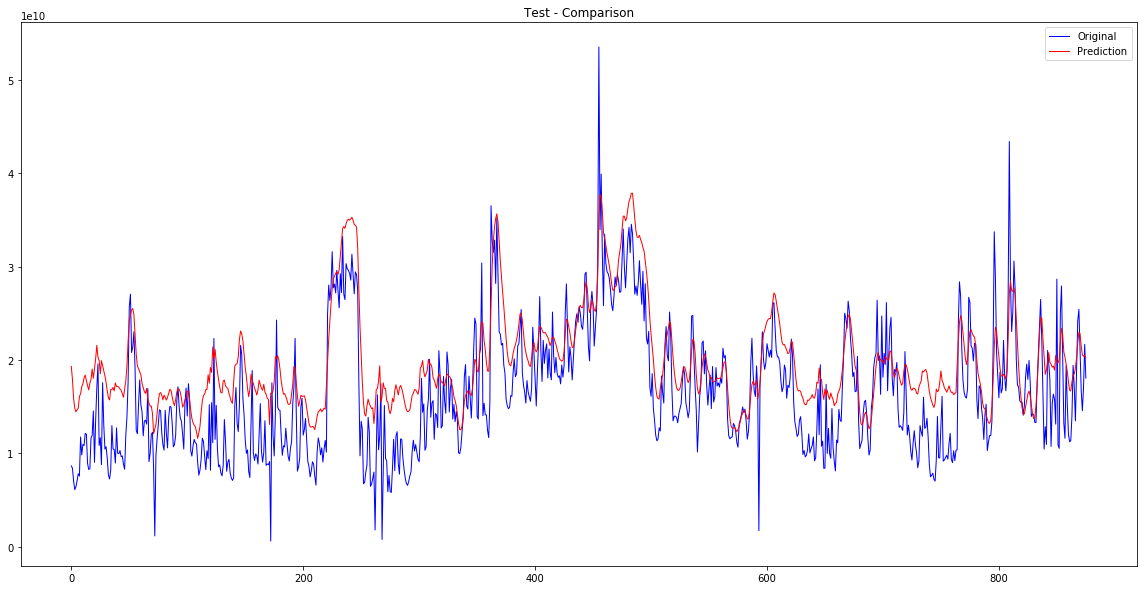

In [107]:
graph_results(model_complex, X_test, Y_test, traffic_scaler)

### Sliding Window

In creating a sliding window, trying to see how many timesteps we need to look back for making predictions.

In [121]:
#Figure out which timesteps are the most important

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

#Windows of data
seq_len = 20
sequence_length = seq_len + 1
result_X = []
result_Y = []
for index in range(X.shape[0] - sequence_length):
    result_X.append(X[index: index + seq_len]) #adding CHIC--STAR
    result_Y.append(X[index + seq_len])
    
result_X = np.array(result_X)
result_Y = np.array(result_Y)

result_X = np.reshape(result_X, (result_X.shape[0], result_X.shape[1]))

# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(result_X, result_Y)

# report selected features
print('Selected Features:')
names = ['t-'+str(i) for i in range(seq_len,0,-1)]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

Selected Features:
t-4
t-3
t-2
t-1


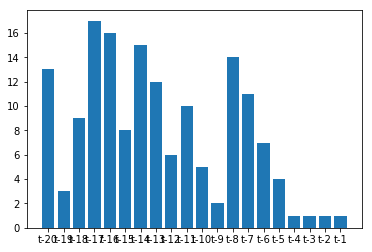

In [128]:
# plot feature rank (smaller is better)
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

Prepare sliding window data for training/testing.

In [27]:
#Select one pathway
X = points_1767_chicstar[["CHIC--STAR"]].as_matrix()
#X = (X - X.mean(axis=0)) / X.std(axis=0)

#Windows of data
seq_len = 4
sequence_length = seq_len + 1
result_X = []
result_Y = []
for index in range(X.shape[0] - sequence_length):
    result_X.append(X[index: index + seq_len]) #adding CHIC--STAR
    result_Y.append(X[index + seq_len])
    
result_X = np.array(result_X)
result_X = result_X.reshape(result_X.shape[0], result_X[0].shape[0])
result_Y = np.array(result_Y)

scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))

result_X = scaler.fit_transform(result_X)
result_Y = traffic_scaler.fit_transform(result_Y)
    
#Train-test split
row = int(round(0.9 * points_1767_chicstar.shape[0]))
X_train = result_X[:row]
Y_train = result_Y[:row]
X_test = result_X[row:]
Y_test = result_Y[row:]

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (7885, 1, 4)
Y_train shape:  (7885, 1)
X_test shape:  (871, 1, 4)
Y_test shape:  (871, 1)


### Resetting state after feeding in each training point 

In [21]:
layers = [1, 10, 100, 1]

print("Build model...")
# model = Sequential()
# model.add(LSTM(
#     input_shape=(layers[1], layers[0]),
#     output_dim=layers[1],
#     return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(
#     layers[2],
#     return_sequences=False))
# model.add(Dropout(0.2))

# model.add(Dense(
#     output_dim=layers[3]))
# model.add(Activation("relu"))

model_slide = Sequential()
model_slide.add(LSTM(10, batch_input_shape=(1, 1, 1), return_sequences=False, stateful=True))
model_slide.add(Dense(1))

model_slide.compile(loss="mse", optimizer='adam')

Build model...


In [22]:
from keras.callbacks import Callback

class ResetStatesCallback(Callback):
    def __init__(self):
        self.counter = 0

    def on_batch_begin(self, batch, logs={}):
        if self.counter % seq_len == 0:
            self.model.reset_states()
        self.counter += 1

In [24]:
nb_epoch = 32

print('Train model...')
for i in range(nb_epoch):
    #mean_tr_acc = []
    mean_tr_loss = []
    for i in range(len(X_train)):
        y_true = Y_train[i]
        for j in range(seq_len):
            tr_loss= model_slide.train_on_batch(np.expand_dims(np.expand_dims(X_train[i][j], axis=1), axis=1),
                                                   np.array([y_true]))
            #mean_tr_acc.append(tr_acc)
            mean_tr_loss.append(tr_loss)
        model_slide.reset_states()

    #print('accuracy training = {}'.format(np.mean(mean_tr_acc)))
    print('loss training = {}'.format(np.mean(mean_tr_loss)))
    print('___________________________________')

# for i in range(nb_epoch):
#     model.fit(X_train, Y_train, epochs=1, batch_size=batch_size, shuffle=False)
#     model.reset_states()

Train model...
loss training = 0.00293637928553
___________________________________
loss training = 0.00269949994981
___________________________________
loss training = 0.00264476565644
___________________________________
loss training = 0.00258605880663
___________________________________


KeyboardInterrupt: 

### Resetting state after each training epoch 

In [94]:
model_slide = Sequential()
model_slide.add(LSTM(15, batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True))
model_slide.add(Dense(1))

In [95]:
nb_epoch = 20

print("-- Building --")
model_slide.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    model_slide.fit(X_train, Y_train, epochs=1, batch_size=batch_size, shuffle=False)
    model_slide.reset_states()

-- Building --
-- Training --
Epoch 1/1
7885/7885 [==============================] - 71s 9ms/step - loss: 0.0031
Epoch 1/1
7885/7885 [==============================] - 70s 9ms/step - loss: 0.0021
Epoch 1/1
7885/7885 [==============================] - 70s 9ms/step - loss: 0.0021
Epoch 1/1
7885/7885 [==============================] - 70s 9ms/step - loss: 0.0022
Epoch 1/1
7885/7885 [==============================] - 70s 9ms/step - loss: 0.0021
Epoch 1/1
7885/7885 [==============================] - 70s 9ms/step - loss: 0.0020
Epoch 1/1
7885/7885 [==============================] - 71s 9ms/step - loss: 0.0019
Epoch 1/1
7885/7885 [==============================] - 71s 9ms/step - loss: 0.0019
Epoch 1/1
7102/7885 [==========================>...] - ETA: 7s - loss: 0.0020

/Users/kunalsingh/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135701). Check your callbacks.
  % delta_t_median)


7126/7885 [==========================>...] - ETA: 8s - loss: 0.0020

/Users/kunalsingh/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159375). Check your callbacks.
  % delta_t_median)
/Users/kunalsingh/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119517). Check your callbacks.
  % delta_t_median)


7885/7885 [==============================] - 83s 10ms/step - loss: 0.0019
Epoch 1/1
7885/7885 [==============================] - 71s 9ms/step - loss: 0.0019
Epoch 1/1
7885/7885 [==============================] - 69s 9ms/step - loss: 0.0019
Epoch 1/1
7885/7885 [==============================] - 70s 9ms/step - loss: 0.0019
Epoch 1/1
7885/7885 [==============================] - 69s 9ms/step - loss: 0.0019
Epoch 1/1
7885/7885 [==============================] - 69s 9ms/step - loss: 0.0018
Epoch 1/1
7885/7885 [==============================] - 68s 9ms/step - loss: 0.0018
Epoch 1/1
7885/7885 [==============================] - 69s 9ms/step - loss: 0.0018
Epoch 1/1
7885/7885 [==============================] - 67s 9ms/step - loss: 0.0018
Epoch 1/1
7885/7885 [==============================] - 69s 9ms/step - loss: 0.0018
Epoch 1/1
7885/7885 [==============================] - 69s 9ms/step - loss: 0.0018
Epoch 1/1
7885/7885 [==============================] - 68s 9ms/step - loss: 0.0018


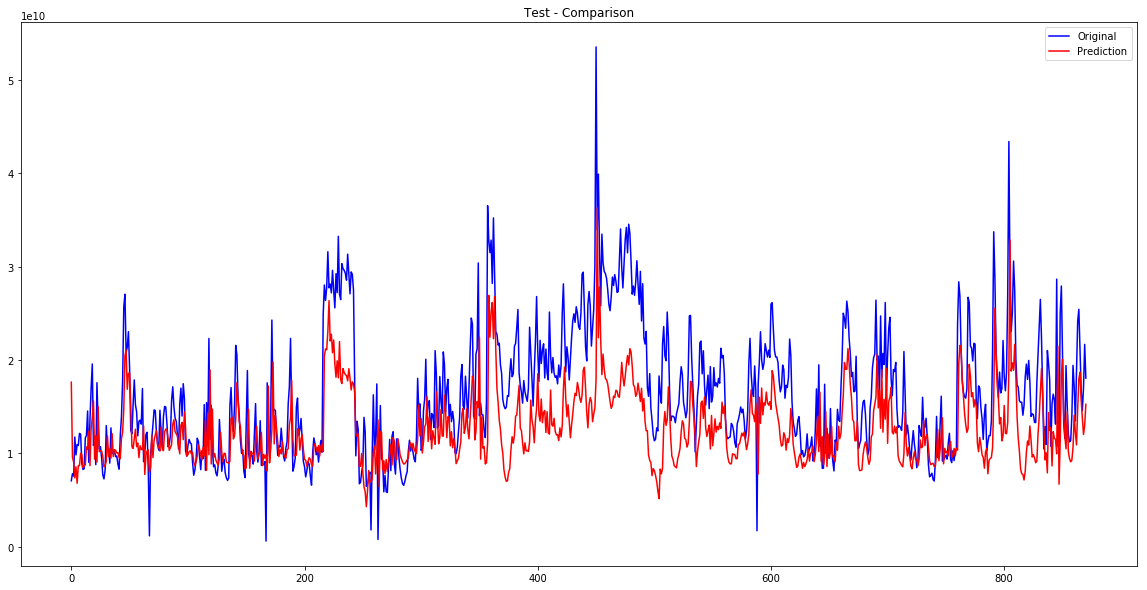

In [96]:
graph_results(model_slide, X_test, Y_test, traffic_scaler)

### Sliding window w/ window features

In [50]:
#mean, var, strength of trend, strength of linearity, strength of curvature, strength of seasonality, strength of peaks
#strength of trough, spectral entropy, 
from tsfresh.feature_extraction import feature_calculators

X = points_1767_chicstar[["CHIC--STAR"]].as_matrix()
#X = (X - X.mean(axis=0)) / X.std(axis=0)

#Windows of data
seq_len = 4
sequence_length = seq_len + 1
result_X = []
result_Y = []
for index in range(X.shape[0] - sequence_length):
    X_seq = X[index: index + seq_len]
    X_seq = np.vstack((X_seq, [np.mean(X_seq)])) #mean
    X_seq = np.vstack((X_seq, [np.std(X_seq)**2])) #variance
    X_seq = np.vstack((X_seq, [np.max(X_seq)])) #max
    X_seq = np.vstack((X_seq, [np.min(X_seq)])) #min
    X_seq = np.vstack((X_seq, [feature_calculators.skewness(pd.Series(X_seq.reshape(X_seq.shape[0])))])) #skewness
    X_seq = np.vstack((X_seq, [feature_calculators.autocorrelation(pd.Series(X_seq.reshape(X_seq.shape[0])), 1)])) #1st order autocorr
    result_X.append(X_seq)
    
    result_Y.append(X[index + seq_len])

result_X = np.array(result_X)
result_X = result_X.reshape(result_X.shape[0], result_X[0].shape[0])
result_Y = np.array(result_Y)

scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))

result_X = scaler.fit_transform(result_X)
result_Y = traffic_scaler.fit_transform(result_Y)
    
#Train-test split
row = int(round(0.9 * points_1767_chicstar.shape[0]))
X_train = result_X[:row]
Y_train = result_Y[:row]
X_test = result_X[row:]
Y_test = result_Y[row:]

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

/Users/kunalsingh/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


X_train shape:  (7885, 1, 10)
Y_train shape:  (7885, 1)
X_test shape:  (871, 1, 10)
Y_test shape:  (871, 1)


In [52]:
model_slidefeatures = Sequential()
model_slidefeatures.add(LSTM(10, batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True, return_sequences = True))
model_slidefeatures.add(LSTM(10, batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True))
model_slidefeatures.add(Dense(1))

In [53]:
nb_epoch = 20

print("-- Building --")
model_slidefeatures.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    model_slidefeatures.fit(X_train, Y_train, epochs=1, batch_size=batch_size, shuffle=False)
    model_slidefeatures.reset_states()

-- Building --
-- Training --
Epoch 1/1
7885/7885 [==============================] - 107s 14ms/step - loss: 0.0038
Epoch 1/1
7885/7885 [==============================] - 109s 14ms/step - loss: 0.0031
Epoch 1/1
7885/7885 [==============================] - 110s 14ms/step - loss: 0.0029
Epoch 1/1
7885/7885 [==============================] - 110s 14ms/step - loss: 0.0027
Epoch 1/1
7885/7885 [==============================] - 113s 14ms/step - loss: 0.0022
Epoch 1/1
7885/7885 [==============================] - 110s 14ms/step - loss: 0.0020
Epoch 1/1
7885/7885 [==============================] - 110s 14ms/step - loss: 0.0019
Epoch 1/1
7885/7885 [==============================] - 107s 14ms/step - loss: 0.0019
Epoch 1/1
7885/7885 [==============================] - 106s 13ms/step - loss: 0.0018
Epoch 1/1
7885/7885 [==============================] - 108s 14ms/step - loss: 0.0018
Epoch 1/1
7885/7885 [==============================] - 108s 14ms/step - loss: 0.0018
Epoch 1/1
7885/7885 [==============

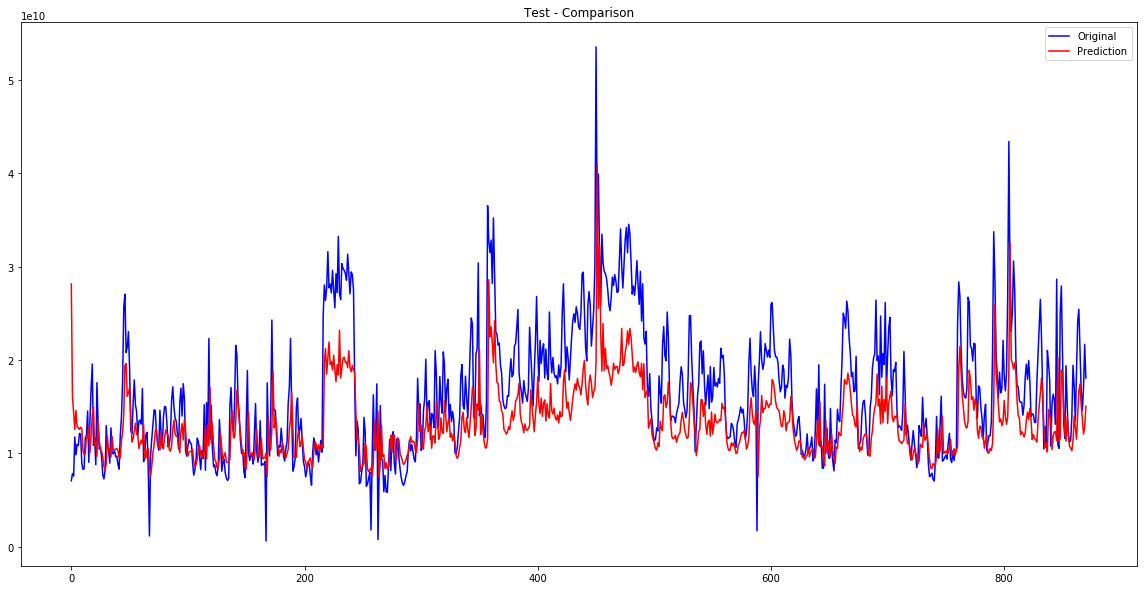

In [56]:
graph_results(model_slide_features, X_test, Y_test, traffic_scaler)

### Bidirectional LSTM

In [77]:
batch_size = 1

#Select one pathway
X = points_1767_chicstar[["CHIC--STAR"]].as_matrix()
#X = (X - X.mean(axis=0)) / X.std(axis=0)

#Windows of data
seq_len = 4
sequence_length = seq_len + 1
result_X = []
result_Y = []
for index in range(X.shape[0] - sequence_length):
    result_X.append(X[index: index + seq_len]) #adding CHIC--STAR
    result_Y.append(X[index + seq_len])
    
result_X = np.array(result_X)
result_X = result_X.reshape(result_X.shape[0], result_X[0].shape[0])
result_Y = np.array(result_Y)

scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))

result_X = scaler.fit_transform(result_X)
result_Y = traffic_scaler.fit_transform(result_Y)
    
#Train-test split
row = int(round(0.9 * points_1767_chicstar.shape[0]))
X_train = result_X[:row]
Y_train = result_Y[:row]
X_test = result_X[row:]
Y_test = result_Y[row:]

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

bi_model = Sequential()
bi_model.add(Bidirectional(LSTM(10), batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2])))
bi_model.add(Dense(1))

/home/kvsingh/anaconda2/envs/carnd-term1/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


X_train shape:  (7885, 1, 4)
Y_train shape:  (7885, 1)
X_test shape:  (871, 1, 4)
Y_test shape:  (871, 1)


In [78]:
nb_epoch = 32

print("-- Building --")
bi_model.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    bi_model.fit(X_train, Y_train, nb_epoch=1, batch_size=batch_size, shuffle=False)

-- Building --
-- Training --
Epoch 1/1
7885/7885 [==============================] - 83s - loss: 0.0031    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0019    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0019    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0019    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0019    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0019    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0019    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0019    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0018    
Epoch 1/1
7885/7885 [==============================] - 80s - loss: 0.0018    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0018    
Epoch 1/1
7885/7885 [==============================] - 81s - loss: 0.0018    
Epoch 1/1
7885/7885 [=============

KeyboardInterrupt: 

## Multistep Forecasting

In [62]:
def train_test_multistep(df, pathway, split_proportion, seq_len_x, seq_len_y, scaler, 
                         traffic_scaler, print_shapes = True):
    """Returns training and test data from Pandas DataFrame of data

    Args:
        df (DataFrame): A Pandas DataFrame containing the data for one site to another site
                        the dataframe should contain time, features (ex. Day, Month, Weekend) 
                        and the response variable.
        pathway (str): The names of the two sites separated by a double dash (ex. "CHIC--STAR")
        split_proportion (float): Proportion (from 0 to 1) of data to be allocated to training data
        seq_len_x (int): Number of time series observations to be included per training window
        seq_len_y (int): Number of time series observations to predict
        scaler (MinMaxScaler): scaler for features
        traffic_scaler (MinMaxScaler): scaler for response variable
        print_shapes (bool): True (default) to print shapes of the training and test data
                             False to turn off printing
        
        """
    
    #Split features from response variable
    X = df[[pathway]].as_matrix()
    
    result_X = []
    result_Y = []

    for index in range(X.shape[0] - (seq_len_x + seq_len_y + 1)):
        result_X.append(X[index: index + seq_len_x]) #adding CHIC--STAR
        result_Y.append(X[index + seq_len_x: index + seq_len_x + seq_len_y])
    
    # for index in range(X.shape[0] - (seq_len_x + seq_len_y + 1)):
    #     X_seq = X[index: index + seq_len_x]
    #     X_seq = np.vstack((X_seq, [np.mean(X_seq)])) #mean
    #     X_seq = np.vstack((X_seq, [np.std(X_seq)**2])) #variance
    #     X_seq = np.vstack((X_seq, [np.max(X_seq)])) #max
    #     X_seq = np.vstack((X_seq, [np.min(X_seq)])) #min
    #     X_seq = np.vstack((X_seq, [feature_calculators.skewness(pd.Series(X_seq.reshape(X_seq.shape[0])))])) #skewness
    #     X_seq = np.vstack((X_seq, [feature_calculators.autocorrelation(pd.Series(X_seq.reshape(X_seq.shape[0])), 1)])) #1st order autocorr
    #     result_X.append(X_seq)

    #     result_Y.append(X[index + seq_len_x: index + seq_len_x + seq_len_y])

    result_X = np.array(result_X)
    result_X = result_X.reshape(result_X.shape[0], result_X[0].shape[0])
    result_Y = np.array(result_Y)
    result_Y = result_Y.reshape(result_Y.shape[0], result_Y[0].shape[0])

    #Normalize
    result_X = scaler.fit_transform(result_X)
    result_Y = traffic_scaler.fit_transform(result_Y)

    #Train-test split
    row = int(round(split_proportion * df.shape[0]))
    X_train = result_X[:row]
    Y_train = result_Y[:row]
    X_test = result_X[row:]
    Y_test = result_Y[row:]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    #X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    #X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    Y_train = np.reshape(Y_train, (Y_train.shape[0], Y_train.shape[1], 1))
    Y_test = np.reshape(Y_test, (Y_test.shape[0], Y_test.shape[1], 1))

    if print_shapes:
        print("X_train shape: ", X_train.shape)
        print("Y_train shape: ", Y_train.shape)
        print("X_test shape: ", X_test.shape)
        print("Y_test shape: ", Y_test.shape)
    
    return X_train, Y_train, X_test, Y_test

Forecasting 30 minutes into the future with 30 minutes of past data

In [63]:
scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))
X_train, Y_train, X_test, Y_test = train_test_multistep(points_1767_chicstar, 
                                                        "CHIC--STAR", 0.9, 60, 60, scaler, traffic_scaler)

X_train shape:  (7885, 60, 1)
Y_train shape:  (7885, 60, 1)
X_test shape:  (755, 60, 1)
Y_test shape:  (755, 60, 1)


/home/kvsingh/anaconda2/envs/carnd-term1/lib/python2.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


### Encoder/Decoder

In [55]:
batch_size = 128
nb_epoch = 200

# model_multiple = Sequential()
# model_multiple.add(LSTM(30, batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True, return_sequences=True))
# model_multiple.add(TimeDistributed(Dense(1)))

model_multiple = Sequential()

#Encoder LSTM
model_multiple.add(LSTM(input_dim=1, output_dim=30, return_sequences=False))

# As the decoder LSTM's input, repeatedly provide with the last hidden state of
# LSTM for each time step
model_multiple.add(RepeatVector(seq_len_y))

#Decoder LSTM
model_multiple.add(LSTM(output_dim=30, return_sequences=True))
model_multiple.add(LSTM(output_dim=30, return_sequences=True))

#Apply a dense layer to the every temporal slice of an input.
model_multiple.add(TimeDistributed(Dense(1))) 
    

print("-- Building --")
model_multiple.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    model_multiple.fit(X_train, Y_train, nb_epoch=1, batch_size=batch_size, shuffle=False)
    model_multiple.reset_states()

-- Building --
-- Training --
Epoch 1/1
7885/7885 [==============================] - 18s - loss: 0.0199    
Epoch 1/1
7885/7885 [==============================] - 15s - loss: 0.0116    
Epoch 1/1
7885/7885 [==============================] - 16s - loss: 0.0121    
Epoch 1/1
7885/7885 [==============================] - 16s - loss: 0.0114    
Epoch 1/1
7885/7885 [==============================] - 16s - loss: 0.0083    
Epoch 1/1
7885/7885 [==============================] - 15s - loss: 0.0072    
Epoch 1/1
7885/7885 [==============================] - 15s - loss: 0.0070    
Epoch 1/1
7885/7885 [==============================] - 15s - loss: 0.0069    
Epoch 1/1
7885/7885 [==============================] - 15s - loss: 0.0068    
Epoch 1/1
7885/7885 [==============================] - 15s - loss: 0.0067    
Epoch 1/1
7885/7885 [==============================] - 16s - loss: 0.0066    
Epoch 1/1
7885/7885 [==============================] - 16s - loss: 0.0066    
Epoch 1/1
7885/7885 [=============

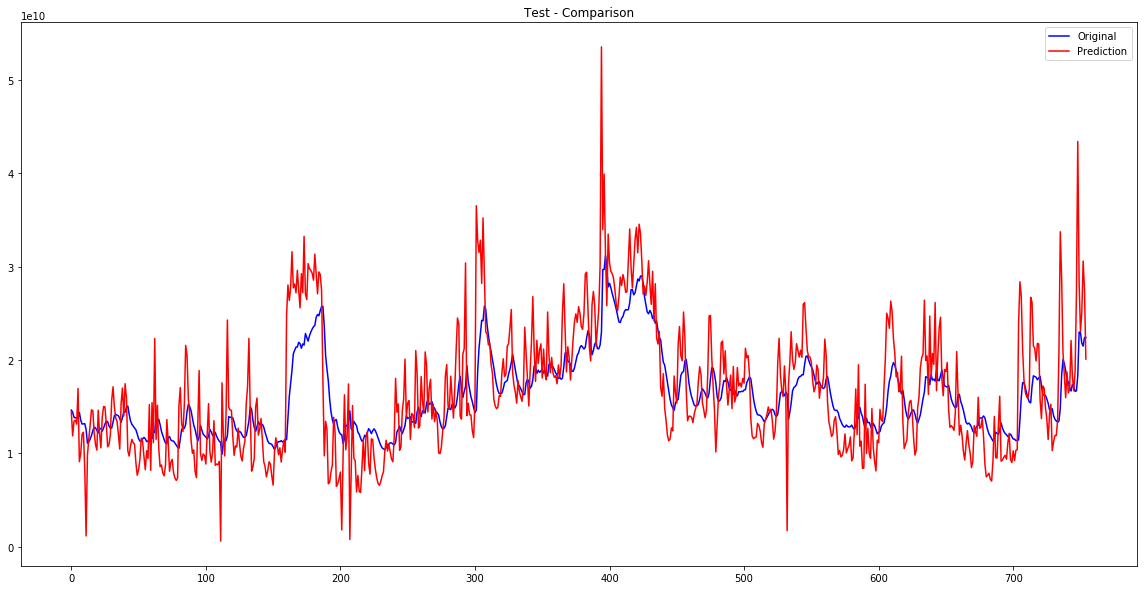

In [61]:
def inverse_transform(pred):    
    return traffic_scaler.inverse_transform(pred)

# walk-forward validation on the test data
pred_x_test = model_multiple.predict(X_test, batch_size)
pred_x_test = np.reshape(pred_x_test, (pred_x_test.shape[0], pred_x_test.shape[1]))
pred_test = inverse_transform(pred_x_test)

y_test = np.float_(Y_test)
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))
y_test_inv = inverse_transform(y_test)

#get 1st item from each list, 2nd item from each list ... 5th item
#plot each of these (total of 5 graphs)
pred_first = [item[0] for item in pred_test]
y_first = [item[0] for item in y_test_inv]

# line_test_pred = np.reshape(pred_test, pred_test.shape[0])
# line_test_real = np.reshape(y_test_inv, y_test_inv.shape[0])
plt.figure(figsize=(20,10))
plt.plot(pred_first, color='blue',label='Original')
plt.plot(y_first, color='red',label='Prediction')
plt.legend(loc='best')
plt.title('Test - Comparison')
plt.show()

Forecasting 10 min into future

In [79]:
scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))
X_train, Y_train, X_test, Y_test = train_test_multistep(points_1767_chicstar, 
                                                        "CHIC--STAR", 0.9, 40, 20, scaler, traffic_scaler)

X_train shape:  (7885, 40, 1)
Y_train shape:  (7885, 20, 1)
X_test shape:  (815, 40, 1)
Y_test shape:  (815, 20, 1)


/home/kvsingh/anaconda2/envs/carnd-term1/lib/python2.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [81]:
batch_size = 128
nb_epoch = 200

model_multiple_10min = Sequential()
model_multiple_10min.add(LSTM(input_dim=1, output_dim=30, return_sequences=False))
model_multiple_10min.add(RepeatVector(20)) #seq_len_y
model_multiple_10min.add(LSTM(output_dim=30, return_sequences=True))
#model_multiple_10min.add(LSTM(output_dim=30, return_sequences=True))
model_multiple_10min.add(TimeDistributed(Dense(1))) 
    
print("-- Building --")
model_multiple_10min.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    model_multiple_10min.fit(X_train, Y_train, nb_epoch=1, batch_size=batch_size, shuffle=False)
    model_multiple_10min.reset_states()

-- Building --
-- Training --
Epoch 1/1
7885/7885 [==============================] - 8s - loss: 0.0418     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0075     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0065     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0061     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0058     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0055     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0053     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0051     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0050     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0049     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0048     
Epoch 1/1
7885/7885 [==============================] - 5s - loss: 0.0047     
Epoch 1/1
7885/7885 [=============

In [87]:
# walk-forward validation on the test data
pred_x_test = model_multiple_10min.predict(X_test, batch_size)
pred_x_test = np.reshape(pred_x_test, (pred_x_test.shape[0], pred_x_test.shape[1]))
pred_test = inverse_transform(pred_x_test)

y_test = np.float_(Y_test)
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))
y_test_inv = inverse_transform(y_test)

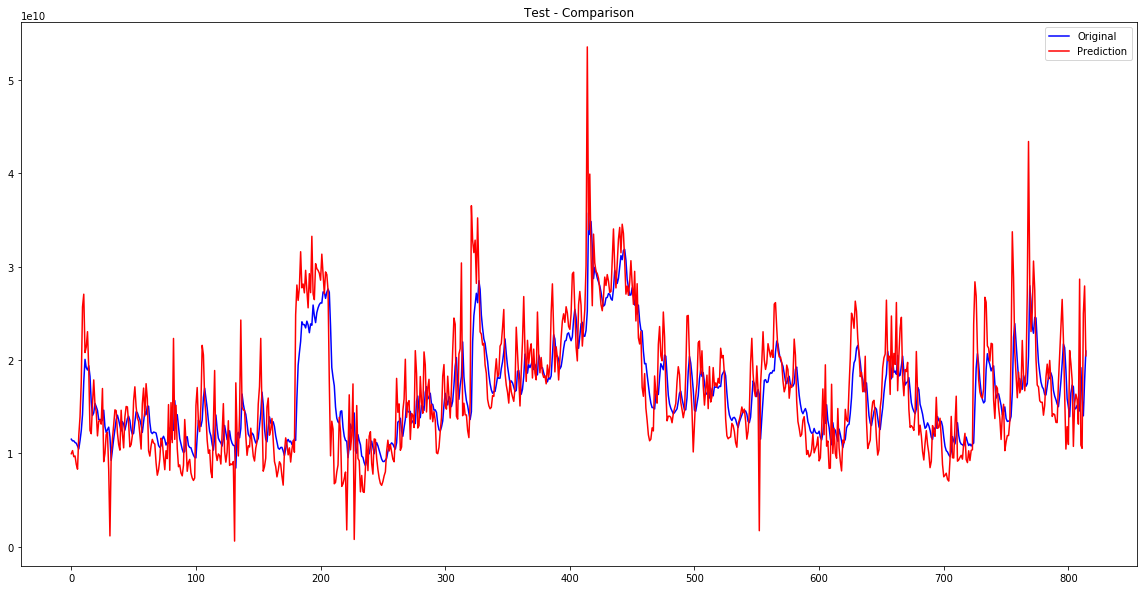

In [88]:
#1 timestep ahead has good prediction

pred_first = [item[0] for item in pred_test]
y_first = [item[0] for item in y_test_inv]

# line_test_pred = np.reshape(pred_test, pred_test.shape[0])
# line_test_real = np.reshape(y_test_inv, y_test_inv.shape[0])
plt.figure(figsize=(20,10))
plt.plot(pred_first, color='blue',label='Original')
plt.plot(y_first, color='red',label='Prediction')
plt.legend(loc='best')
plt.title('Test - Comparison')
plt.show()

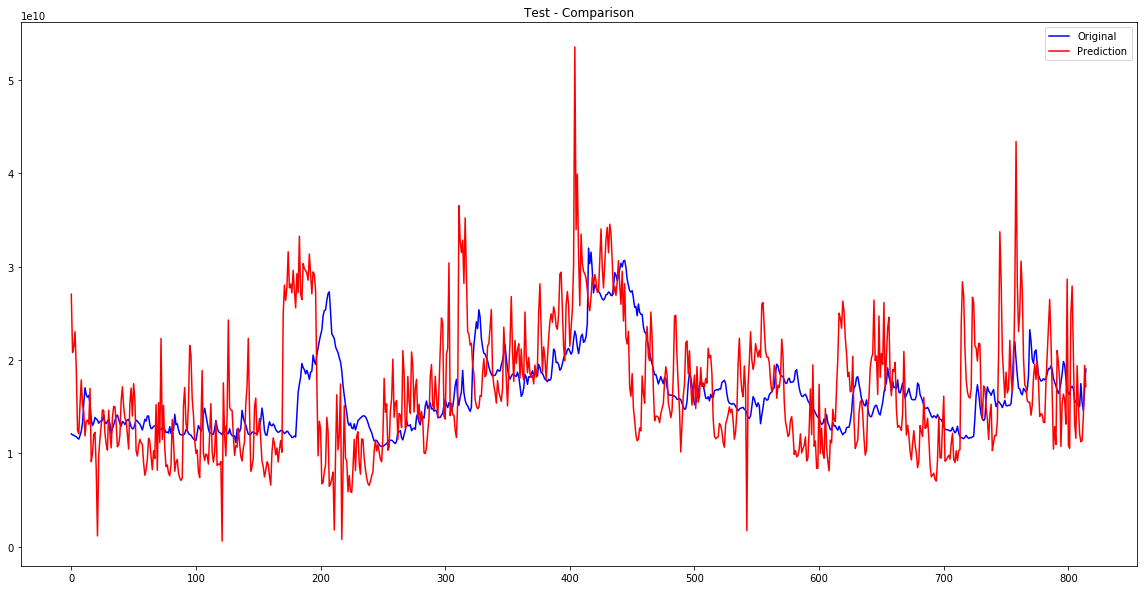

In [89]:
#as you go deeper into prediction, prediction is worse

pred_first = [item[10] for item in pred_test]
y_first = [item[10] for item in y_test_inv]

# line_test_pred = np.reshape(pred_test, pred_test.shape[0])
# line_test_real = np.reshape(y_test_inv, y_test_inv.shape[0])
plt.figure(figsize=(20,10))
plt.plot(pred_first, color='blue',label='Original')
plt.plot(y_first, color='red',label='Prediction')
plt.legend(loc='best')
plt.title('Test - Comparison')
plt.show()

### Encoder/Decoder with Attention

In [102]:
from attention_decoder import AttentionDecoder

In [103]:
#input sequence must be same length as output sequence in the attention scheme
seq_len_x = 5
seq_len_y = 5

scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))
X_train, Y_train, X_test, Y_test = train_test_multistep(points_1767_chicstar, "CHIC--STAR", 0.9, seq_len_x, 
                                                        seq_len_y, scaler, traffic_scaler)

# define model
model_attention = Sequential()
model_attention.add(LSTM(30, input_shape=(seq_len_x, 1), return_sequences=True))
model_attention.add(AttentionDecoder(30, 5))

print("-- Building --")
model_attention.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    model_attention.fit(X_train, Y_train, nb_epoch=1, batch_size=batch_size, shuffle=False)
    model_attention.reset_states()

X_train shape:  (7885, 5, 1)
Y_train shape:  (7885, 5, 1)
X_test shape:  (865, 5, 1)
Y_test shape:  (865, 5, 1)


/home/kvsingh/anaconda2/envs/carnd-term1/lib/python2.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


NameError: global name 'initializers' is not defined

## Generalization to Other Edges

Choosing a random edge

In [68]:
def choose_edge(edge_dict):
    return np.random.choice(edge_dict.keys())

def choose_edges(edge_dict, num_edges):
    return np.random.choice(edge_dict.keys(), num_edges, replace = False)

In [76]:
random_edge = choose_edge(edge_dict)
random_edge_data = query_edge(random_edge, "2018-05-18T18:22:53.253Z", "2018-05-21T18:22:53.253Z")

Cleaning data

In [77]:
points_random_edge = clean_edge_data(random_edge_data)
points_random_edge.head()

,Time,AOFA--WASH,WASH--AOFA
0,2018-05-18 11:22:30,1.198922e+10,1.650024e+10
1,2018-05-18 11:23:00,1.657324e+10,1.923513e+10
2,2018-05-18 11:23:30,1.872518e+10,1.547779e+10
3,2018-05-18 11:24:00,1.703334e+10,1.300329e+10
4,2018-05-18 11:24:30,1.314167e+10,1.144829e+10


In [78]:
pathway = points_random_edge.columns.values[1]
random_edge_features = edge_features(points_random_edge, pathway)
random_edge_features.head()

,Time,AOFA--WASH,Weekend,Day,Hour,Minute
0,2018-05-18 11:22:30,1.198922e+10,0,4,11,22.5
1,2018-05-18 11:23:00,1.657324e+10,0,4,11,23.0
2,2018-05-18 11:23:30,1.872518e+10,0,4,11,23.5
3,2018-05-18 11:24:00,1.703334e+10,0,4,11,24.0
4,2018-05-18 11:24:30,1.314167e+10,0,4,11,24.5


In [79]:
scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))
X_train, Y_train, X_test, Y_test = train_test_wfeatures(random_edge_features, 
                                                        pathway, 0.9, scaler, traffic_scaler, print_shapes = False)

X_train shape:  (7777, 1, 5)
Y_train shape:  (7777, 1)
X_test shape:  (864, 1, 5)
Y_test shape:  (864, 1)


Without training on new data

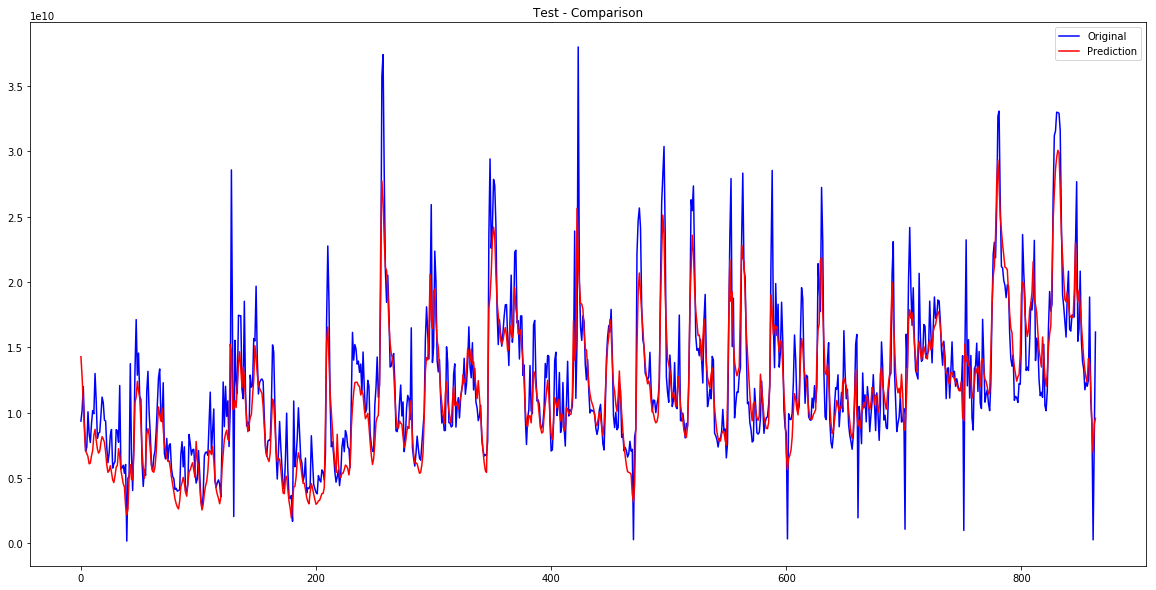

In [80]:
graph_results(model, X_test, Y_test, traffic_scaler)

In [81]:
score = model.evaluate(X_test, Y_test, verbose=0, batch_size = 1)
print('Test loss:', score)

Test loss: 0.004075894802480962


Loss on multiple edges

In [139]:
random_edges = choose_edges(edge_dict, 10)

In [146]:
#Using previous traffic value w/ additional features
for edge_id in random_edges:
    random_edge_data = query_edge(edge_id, "2018-05-18T18:22:53.253Z", "2018-05-21T18:22:53.253Z")
    points_random_edge = clean_edge_data(random_edge_data)
    pathway = points_random_edge.columns.values[1] #choose first pathway to predict on
    random_edge_features = edge_features(points_random_edge, pathway) 
    
    scaler = MinMaxScaler(feature_range=(0,1))
    traffic_scaler = MinMaxScaler(feature_range=(0,1))
    X_train, Y_train, X_test, Y_test = train_test_wfeatures(random_edge_features, 
                                                        pathway, 0, scaler, traffic_scaler, print_shapes = False)
    
    score = model.evaluate(X_test, Y_test, verbose=0, batch_size = 1)
    print('Test loss for pathway %s with ID %s: %f' %(pathway, str(edge_id), score)) 

Test loss for pathway BOIS--INL with ID 1754: 0.001208
Test loss for pathway ATLA--SRS with ID 1749: 0.000682
Test loss for pathway HOUS--NASH with ID 1785: 0.002827
Test loss for pathway AOFA--STAR with ID 1745: 0.001046
Test loss for pathway EQX-ASH--NETL-MGN with ID 1834: 0.002172
Test loss for pathway ALBQ--SNLA with ID 1737: 0.001720
Test loss for pathway HOUS--PANTEX with ID 1773: 0.002455
Test loss for pathway EQX-ASH--EQX-CHI with ID 1823: 0.001443
Test loss for pathway SAND--SUNN with ID 1806: 0.005895
Test loss for pathway SLAC--SUNN with ID 1807: 0.002218


In [148]:
#Using sliding window w/ window features
for edge_id in random_edges:
    random_edge_data = query_edge(edge_id, "2018-05-18T18:22:53.253Z", "2018-05-21T18:22:53.253Z")
    points_random_edge = clean_edge_data(random_edge_data)
    pathway = points_random_edge.columns.values[1] #choose first pathway to predict on
    
    X = points_random_edge[[pathway]].as_matrix()

    #Windows of data
    seq_len = 4
    sequence_length = seq_len + 1
    result_X = []
    result_Y = []
    for index in range(X.shape[0] - sequence_length):
        X_seq = X[index: index + seq_len]
        X_seq = np.vstack((X_seq, [np.mean(X_seq)])) #mean
        X_seq = np.vstack((X_seq, [np.std(X_seq)**2])) #variance
        X_seq = np.vstack((X_seq, [np.max(X_seq)])) #max
        X_seq = np.vstack((X_seq, [np.min(X_seq)])) #min
        X_seq = np.vstack((X_seq, [feature_calculators.skewness(pd.Series(X_seq.reshape(X_seq.shape[0])))])) #skewness
        X_seq = np.vstack((X_seq, [feature_calculators.autocorrelation(pd.Series(X_seq.reshape(X_seq.shape[0])), 1)])) #1st order autocorr
        result_X.append(X_seq)

        result_Y.append(X[index + seq_len])

    result_X = np.array(result_X)
    result_X = result_X.reshape(result_X.shape[0], result_X[0].shape[0])
    result_Y = np.array(result_Y)

    scaler = MinMaxScaler(feature_range=(0,1))
    traffic_scaler = MinMaxScaler(feature_range=(0,1))

    result_X = scaler.fit_transform(result_X)
    result_Y = traffic_scaler.fit_transform(result_Y)

    #Train-test split
    row = int(round(0 * points_random_edge.shape[0]))
    X_train = result_X[:row]
    Y_train = result_Y[:row]
    X_test = result_X[row:]
    Y_test = result_Y[row:]

    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    
    score = model_slidefeatures.evaluate(X_test, Y_test, verbose=0, batch_size = 1)
    print('Test loss for pathway %s with ID %s: %f' %(pathway, str(edge_id), score)) 

Test loss for pathway BOIS--INL with ID 1754: 0.003517
Test loss for pathway ATLA--SRS with ID 1749: 0.006874
Test loss for pathway HOUS--NASH with ID 1785: 0.006284
Test loss for pathway AOFA--STAR with ID 1745: 0.003219
Test loss for pathway EQX-ASH--NETL-MGN with ID 1834: 0.008494
Test loss for pathway ALBQ--SNLA with ID 1737: 0.007068
Test loss for pathway HOUS--PANTEX with ID 1773: 0.007793
Test loss for pathway EQX-ASH--EQX-CHI with ID 1823: 0.007100
Test loss for pathway SAND--SUNN with ID 1806: 0.019313
Test loss for pathway SLAC--SUNN with ID 1807: 0.007089


## Using Less Training Data

In [137]:
scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))
X_train, Y_train, X_test, Y_test = train_test_wfeatures(points_1767_chicstar, 
                                                        "CHIC--STAR", 0.66, scaler, traffic_scaler)

X_train shape:  (5782, 1, 5)
Y_train shape:  (5782, 1)
X_test shape:  (2979, 1, 5)
Y_test shape:  (2979, 1)


In [95]:
model_lessdata = Sequential()
model_lessdata.add(LSTM(10, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
model_lessdata.add(Dense(1))

In [96]:
nb_epoch = 20

print("-- Building --")
model_lessdata.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    model_lessdata.fit(X_train, Y_train, epochs=1, batch_size=batch_size, shuffle=False)
    model_lessdata.reset_states()

-- Building --
-- Training --
Epoch 1/1
5782/5782 [==============================] - 55s 10ms/step - loss: 0.0040
Epoch 1/1
5782/5782 [==============================] - 55s 9ms/step - loss: 0.0023
Epoch 1/1
5782/5782 [==============================] - 50s 9ms/step - loss: 0.0016
Epoch 1/1
5782/5782 [==============================] - 57s 10ms/step - loss: 0.0015
Epoch 1/1
5782/5782 [==============================] - 52s 9ms/step - loss: 0.0015
Epoch 1/1
5782/5782 [==============================] - 53s 9ms/step - loss: 0.0015
Epoch 1/1
5782/5782 [==============================] - 51s 9ms/step - loss: 0.0015
Epoch 1/1
5782/5782 [==============================] - 52s 9ms/step - loss: 0.0014
Epoch 1/1
5782/5782 [==============================] - 51s 9ms/step - loss: 0.0014
Epoch 1/1
5782/5782 [==============================] - 52s 9ms/step - loss: 0.0014
Epoch 1/1
5782/5782 [==============================] - 54s 9ms/step - loss: 0.0014
Epoch 1/1
5782/5782 [==============================] - 

0.002878374112287778


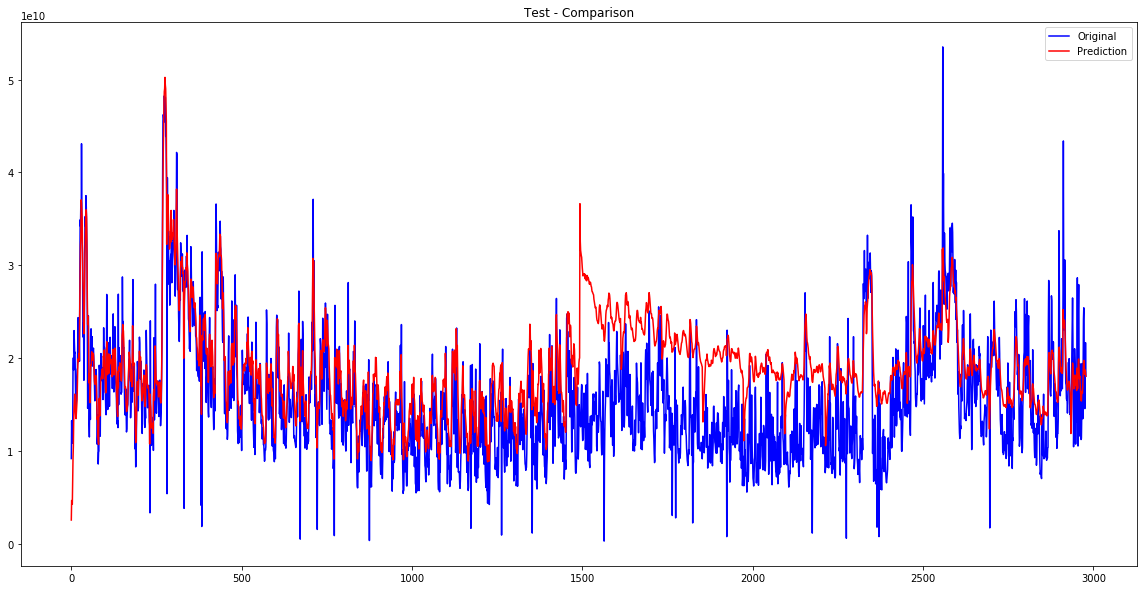

In [131]:
score = model_lessdata.evaluate(X_test, Y_test, verbose=0, batch_size = 1)
print(score)
graph_results(model_lessdata, X_test, Y_test, traffic_scaler)

2 days worth of data seems to have worse performance to 3 days. 

## Using More Training Data

In [122]:
edge_1767_more = query_edge('1767', "2018-05-17T18:22:53.253Z", "2018-05-21T18:22:53.253Z")
points_1767_more = clean_edge_data(edge_1767_more)
pathway = points_1767_more.columns.values[1]
points_1767_features = edge_features(points_1767_more, pathway)

In [138]:
scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))
X_train, Y_train, X_test, Y_test = train_test_wfeatures(points_1767_features, 
                                                        "CHIC--STAR", 0.9, scaler, traffic_scaler)

X_train shape:  (10369, 1, 5)
Y_train shape:  (10369, 1)
X_test shape:  (1152, 1, 5)
Y_test shape:  (1152, 1)


In [112]:
model_moredata = Sequential()
model_moredata.add(LSTM(10, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
model_moredata.add(Dense(1))

In [113]:
nb_epoch = 20

print("-- Building --")
model_moredata.compile(loss="mse",
                  optimizer = 'adam')

print('-- Training --')
for i in range(nb_epoch):
    model_moredata.fit(X_train, Y_train, epochs=1, batch_size=batch_size, shuffle=False)
    model_moredata.reset_states()

-- Building --
-- Training --
Epoch 1/1
10369/10369 [==============================] - 90s 9ms/step - loss: 0.0025
Epoch 1/1
10369/10369 [==============================] - 88s 9ms/step - loss: 0.0013
Epoch 1/1
10369/10369 [==============================] - 94s 9ms/step - loss: 0.0013
Epoch 1/1
10369/10369 [==============================] - 93s 9ms/step - loss: 0.0013
Epoch 1/1
10369/10369 [==============================] - 88s 8ms/step - loss: 0.0014
Epoch 1/1
10369/10369 [==============================] - 89s 9ms/step - loss: 0.0014
Epoch 1/1
10369/10369 [==============================] - 91s 9ms/step - loss: 0.0013
Epoch 1/1
10369/10369 [==============================] - 95s 9ms/step - loss: 0.0013
Epoch 1/1
10369/10369 [==============================] - 93s 9ms/step - loss: 0.0013
Epoch 1/1
10369/10369 [==============================] - 90s 9ms/step - loss: 0.0013
Epoch 1/1
10369/10369 [==============================] - 91s 9ms/step - loss: 0.0013
Epoch 1/1
10369/10369 [============

0.0008014513116356872


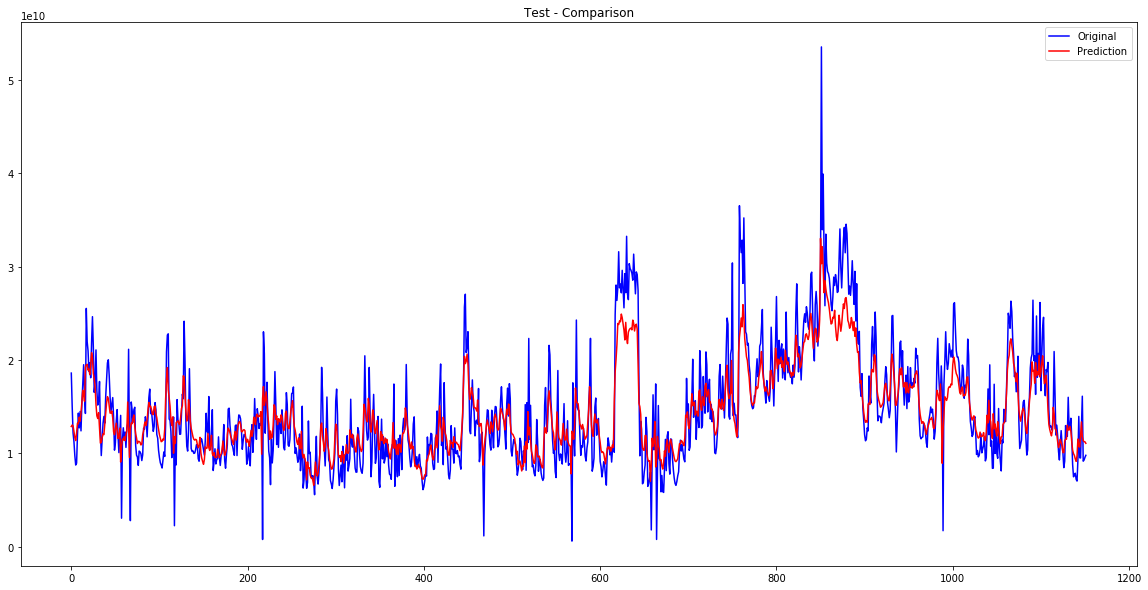

In [129]:
score = model_moredata.evaluate(X_test, Y_test, verbose=0, batch_size = 1)
print(score)
graph_results(model_moredata, X_test, Y_test, traffic_scaler)

## Optimization

In [18]:
#Split features from response variable
X = points_1767_chicstar.drop('Time', axis = 1).as_matrix() #drop time to get all features
Y = points_1767_chicstar[["CHIC--STAR"]].shift(1).fillna(0).as_matrix() #shift traffic values down 1 to create response variable

#Normalize
scaler = MinMaxScaler(feature_range=(0,1))
traffic_scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)
Y = traffic_scaler.fit_transform(Y)

#reshape to [samples, features, timesteps]
X = X.reshape(X.shape[0], 1, X.shape[1])

Number of hidden neurons (using single prev. value w/ additional features)

In [35]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold

batch_size = 1
nb_epoch = 10

seed = 7
np.random.seed(seed)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kf = KFold(n_splits=2)
kf.get_n_splits(X)

cvscores = []
for i in range(2,20): #number of neurons
    model_cv = Sequential()
    model_cv.add(LSTM(i, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model_cv.add(Dense(1))

    print("-- Building --")
    model_cv.compile(loss="mse",
                      optimizer = 'adam')

    print('-- Training --')
    for train, test in kf.split(X): #10-fold CV
        for j in range(nb_epoch):
            model_cv.fit(X[train], Y[train], epochs=1, batch_size=batch_size, shuffle=False, verbose = 0) #dont show progress bar
            model_cv.reset_states()
    
        score = model_cv.evaluate(X[test], Y[test], verbose=0, batch_size = 1)
        cvscores.append(score)
    print(str(i), " neurons:")
    print("%f (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

-- Building --
-- Training --
2  neurons:
0.007397 (+/- 0.00%)
-- Building --
-- Training --
3  neurons:
0.006456 (+/- 0.00%)
-- Building --
-- Training --
4  neurons:
0.006683 (+/- 0.00%)
-- Building --
-- Training --
5  neurons:
0.005848 (+/- 0.00%)
-- Building --
-- Training --
6  neurons:
0.005544 (+/- 0.00%)
-- Building --
-- Training --
7  neurons:
0.006106 (+/- 0.00%)
-- Building --
-- Training --
8  neurons:
0.006435 (+/- 0.00%)
-- Building --
-- Training --
9  neurons:
0.005980 (+/- 0.00%)
-- Building --
-- Training --
10  neurons:
0.006256 (+/- 0.00%)
-- Building --
-- Training --
11  neurons:
0.005829 (+/- 0.00%)
-- Building --
-- Training --
12  neurons:
0.006084 (+/- 0.00%)
-- Building --
-- Training --


KeyboardInterrupt: 